In [1]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 5.9 MB/s eta 0:00:00


In [3]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [4]:
IND_SIZE = 10
MIN_VALUE = -1
MAX_VALUE = 1
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [6]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [7]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [8]:
import numpy as np
def sumPowell(x):
  sumY = 0
  for index, xValue in enumerate(x, 1):    
    absX = np.absolute(xValue) 
    powerX = np.power(absX, index + 1)
    sumY += powerX   
  return (sumY,)
  #return (sum(x),)

In [9]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", sumPowell)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg    	std     	min     	max    
0  	30    	1.70213	0.675469	0.222268	3.11149
1  	180   	0.823126	0.532309	0.00644481	1.92079
2  	184   	0.435201	0.36961 	0.00644481	1.24737
3  	188   	0.121172	0.150736	0.00528549	0.63415
4  	180   	0.0221562	0.0367693	0.00435789	0.130262
5  	182   	0.00567597	0.00103836	0.00334199	0.00644481
6  	189   	0.00455412	0.00104914	0.00334199	0.00644481
7  	181   	0.00365837	0.000540759	0.00305889	0.00465764
8  	180   	0.00338907	0.000266618	0.00305889	0.00465764
9  	179   	0.00329885	0.00029061 	0.00305889	0.00465764
10 	183   	0.00316308	0.000218065	0.00229164	0.00334199
11 	183   	0.00299891	0.000206251	0.00229164	0.00327354
12 	178   	0.00280876	0.00029768 	0.00229164	0.00305889
13 	184   	0.00258619	0.000285409	0.00229164	0.00305889
14 	181   	0.00237232	0.000115725	0.00229164	0.00257474
15 	179   	0.00229164	3.59528e-09	0.00229164	0.00229166
16 	177   	0.00229116	2.5981e-06 	0.00227716	0.00229164
17 	187   	0.0022896 	5.21638e-06	0.00227547	

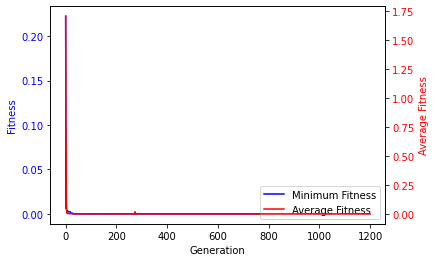

Best individual is Individual('d', [-8.477228110045627e-05, -0.00037039745281304136, -0.0007206891710984532, 0.0007519608780749451, 0.002208424811565522, -2.0698023252438695e-05, -0.0014339958941133404, -0.0001012627861123631, 0.003250594178757239, -0.0038258641277164815]), fitness: (7.237426177651577e-09,)
gen	nevals	avg    	std     	min      	max    
0  	30    	1.57624	0.839534	0.0337615	3.61715
1  	180   	0.830943	0.483069	0.0337615	1.80472
2  	183   	0.44787 	0.297658	0.0333659	1.19348
3  	176   	0.237189	0.207946	0.0333659	0.695821
4  	179   	0.0777271	0.119207	0.0243919	0.546406
5  	179   	0.0301413	0.00475212	0.0208396	0.0345319
6  	182   	0.0253123	0.00488507	0.020315 	0.0337615
7  	179   	0.0221508	0.00457651	0.0111241	0.0337614
8  	180   	0.0177641	0.00435018	0.0105857	0.0234659
9  	184   	0.0141626	0.00445956	0.00624024	0.0208396
10 	182   	0.00944929	0.00282955	0.00612643	0.0176695
11 	181   	0.00699181	0.00129517	0.00612643	0.0105857
12 	183   	0.00619568	0.000285141	0.005

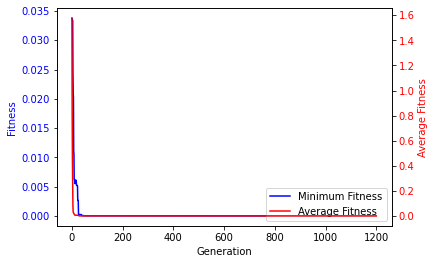

Best individual is Individual('d', [0.00011630143024006154, 0.00020679227657593568, 0.00016349112869167189, -0.0016273705094732346, -0.0007863002225839179, -0.0015766337113998362, -0.0007790804494031861, -0.000406648699022525, 0.0034891184828527606, 0.005420385135877261]), fitness: (1.353487787201739e-08,)
gen	nevals	avg    	std     	min     	max    
0  	30    	1.66806	0.707899	0.430997	2.83122
1  	174   	1.05075	0.458365	0.4953  	2.25742
2  	178   	0.705849	0.225067	0.189817	1.13836
3  	176   	0.393196	0.200166	0.0907146	0.775181
4  	184   	0.261876	0.129618	0.0907143	0.632762
5  	181   	0.17369 	0.0586847	0.0824091	0.370745
6  	169   	0.113607	0.0282015	0.0819183	0.213278
7  	175   	0.0921865	0.0131339	0.0707845	0.113657
8  	175   	0.0817572	0.00884574	0.0707848	0.105697
9  	174   	0.0751843	0.00398756	0.0707848	0.0824088
10 	183   	0.0670069	0.017378  	0.00841061	0.0733485
11 	184   	0.064403 	0.0220032 	0.00841061	0.0801543
12 	178   	0.0448195	0.0317837 	0.00793691	0.0730142
13 	1

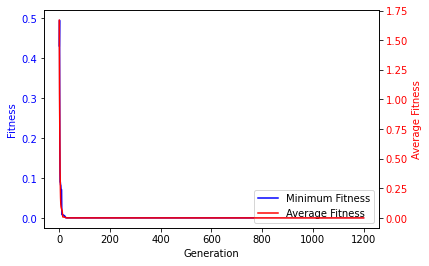

Best individual is Individual('d', [-7.480740509389731e-06, 0.0005299479876098171, 0.0011707115735333715, 0.004147893475571027, 0.00010980484427852244, 0.004201219837646611, 0.008154624460184114, -0.00011937274645938646, -0.00444830342592833, 0.01945038730662958]), fitness: (2.0790097410881642e-10,)
gen	nevals	avg    	std     	min     	max 
0  	30    	1.64004	0.746679	0.273937	3.61
1  	180   	0.856809	0.365071	0.273937	1.63561
2  	180   	0.575156	0.345534	0.108999	1.26873
3  	181   	0.35046 	0.243722	0.108999	0.9238 
4  	177   	0.140578	0.0584163	0.0870809	0.33191
5  	176   	0.103311	0.0109931	0.0698499	0.124942
6  	183   	0.0916874	0.0136378	0.0619278	0.108999
7  	182   	0.0754626	0.0116702	0.0422876	0.0916209
8  	181   	0.0644451	0.0130024	0.0422876	0.09162  
9  	182   	0.0504745	0.0113007	0.0338092	0.0703427
10 	181   	0.0408736	0.00684083	0.0277975	0.06193  
11 	190   	0.0355308	0.00733194	0.0277972	0.0619298
12 	182   	0.0319769	0.00465444	0.0277982	0.0422876
13 	186   	0.0286319	

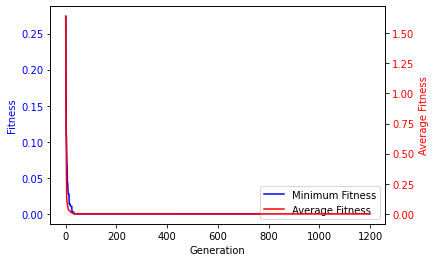

Best individual is Individual('d', [1.4314649041495488e-05, -6.48992636940952e-05, -0.00011992897199356045, 0.00045197806606664436, -0.006835086598476481, -0.0009462922453701357, 0.0020742727775051144, -0.00022628956162644345, 0.0024598967470702074, 0.003771602615258253]), fitness: (2.052847211120253e-10,)
gen	nevals	avg    	std     	min     	max    
0  	30    	1.87659	0.908881	0.489204	4.30982
1  	168   	1.16743	0.465109	0.19571 	1.9993 
2  	180   	0.735602	0.359966	0.0878189	1.68281
3  	177   	0.493502	0.171702	0.0827434	0.949557
4  	181   	0.37503 	0.142984	0.0231861	0.552608
5  	182   	0.261587	0.112501	0.0825415	0.403675
6  	178   	0.167106	0.0870394	0.0221969	0.369004
7  	183   	0.0973138	0.0550281	0.0221969	0.214232
8  	173   	0.0641345	0.0395448	0.0146892	0.171238
9  	175   	0.0316466	0.0214518	0.0144953	0.0803112
10 	169   	0.0212444	0.0114872	0.0144953	0.0774088
11 	173   	0.0152467	0.002693 	0.00952098	0.0220737
12 	178   	0.0141547	0.00158942	0.00952098	0.0181883
13 	184   

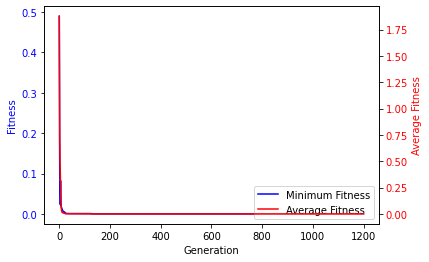

Best individual is Individual('d', [0.0005884353328773993, -0.0006477318658245665, -0.018508405012158887, -0.0007667129400661943, -0.002326198652954515, 0.013507574701404887, 0.0035701993963942434, -0.011638236471038378, -0.000128506174434221, -0.0037450857735889936]), fitness: (4.6387606076111543e-07,)


In [10]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show() 

    print("Best individual is %s, fitness: %s" % (hof[0], hof[0].fitness.values))


    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(5):
       main()